# 📊 PHÂN TÍCH DỮ LIỆU ĐỘT QUỴ - HEALTHCARE

## 🔍 Giới thiệu

Notebook này thực hiện phân tích khám phá dữ liệu (EDA) trên bộ dữ liệu về đột quỵ, nhằm tìm hiểu các yếu tố nguy cơ và mối quan hệ giữa các biến với khả năng xảy ra đột quỵ. Kết quả phân tích sẽ cung cấp insights quan trọng cho việc xây dựng mô hình dự đoán và đề xuất các biện pháp phòng ngừa.

### 📋 Mục tiêu phân tích

- Hiểu rõ cấu trúc và đặc điểm của bộ dữ liệu
- Xác định các yếu tố có mối liên hệ mạnh với nguy cơ đột quỵ
- Chuẩn bị dữ liệu cho việc xây dựng mô hình dự đoán
- Đề xuất các biện pháp can thiệp dựa trên kết quả phân tích

### 🏥 Về đột quỵ

Đột quỵ là một tình trạng y tế nghiêm trọng xảy ra khi nguồn cung cấp máu đến một phần của não bị gián đoạn hoặc giảm, khiến các mô não không nhận đủ oxy và chất dinh dưỡng, dẫn đến tổn thương tế bào não. Đột quỵ là một trong những nguyên nhân hàng đầu gây tử vong và tàn tật trên toàn cầu.

Việc xác định sớm các yếu tố nguy cơ và dự đoán khả năng xảy ra đột quỵ có thể giúp các chuyên gia y tế can thiệp kịp thời, giảm thiểu tác động nghiêm trọng của bệnh.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

# Bỏ qua cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)

## 📥 Tải dữ liệu và khám phá ban đầu

Đầu tiên, chúng ta sẽ tải bộ dữ liệu từ file CSV và thực hiện khám phá ban đầu để hiểu cấu trúc dữ liệu.

In [2]:
df = pd.read_csv('/Users/quanglong/PHÂN TÍCH DỮ LIỆU /data/raw/healthcare-dataset-stroke-data.csv.xls')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 🔄 Tiền xử lý dữ liệu

### Đổi tên cột từ tiếng Anh sang tiếng Việt

Để thuận tiện cho việc phân tích và báo cáo, chúng ta sẽ đổi tên các cột từ tiếng Anh sang tiếng Việt, đồng thời giữ lại tên gốc trong ngoặc đơn để dễ tham chiếu.

In [3]:
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
### Đổi tên cột từ tiếng Anh sang tiếng Việt
df_encoded.rename(columns={
    'stroke': 'Đột quỵ',
    'gender': 'Giới tính',
    'age': 'Tuổi',
    'hypertension': 'Huyết áp',
    'heart_disease': 'Sick',
    'ever_married': 'Đã kết hôn',
    'work_type': 'Nghề nghiệp',
    'Residence_type': 'Loại nhà ở',
    'avg_glucose_level': 'Glucose',
    'bmi': 'Chỉ số BMI',
    'smoking_status': 'Tình trạng hút thuốc',
    'stroke': 'Đột quỵ'
}, inplace=True)

## 📊 Phân tích thống kê mô tả

Thực hiện phân tích thống kê mô tả để hiểu tổng quan về dữ liệu, bao gồm các đặc trưng cơ bản của từng biến.

In [4]:
df_encoded.describe()

,id,Tuổi,Huyết áp,Sick,Glucose,Chỉ số BMI,Đột quỵ
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 🧹 Xử lý dữ liệu thiếu và ngoại lai

Kiểm tra và xử lý các giá trị thiếu (null) và giá trị ngoại lai (outliers) trong dữ liệu để đảm bảo chất lượng phân tích.

In [5]:
### Xử lý dữ liệu thiếu & ngoại lai
df_encoded.isnull().sum()


id                                  0
Tuổi                                0
Huyết áp                            0
Sick                                0
Glucose                             0
Chỉ số BMI                        201
Đột quỵ                             0
gender_Male                         0
gender_Other                        0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

## 📈 Phân tích đơn biến

### Phân tích biến mục tiêu (Đột quỵ)

Tìm hiểu về phân phối của biến mục tiêu - tỷ lệ đột quỵ trong tập dữ liệu.

In [6]:
### Phân tích biến mục tiêu (stroke) 
## Note rõ 0 và 1 là gì 
## 0: Không có đột quỵ
## 1: Có đột quỵ
df_encoded['Đột quỵ'].value_counts()


Đột quỵ
0    4861
1     249
Name: count, dtype: int64

### Phân tích các biến số học

Khám phá phân phối của các biến số học như tuổi, mức đường huyết trung bình và chỉ số BMI.

In [7]:
##Phân tích biến số các các chỉ số biến đổi
df_encoded.describe()


,id,Tuổi,Huyết áp,Sick,Glucose,Chỉ số BMI,Đột quỵ
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Phân tích các biến phân loại

Khám phá phân phối của các biến phân loại như giới tính, tình trạng hôn nhân, loại công việc, nơi cư trú và tình trạng hút thuốc.

KeyError: 'Giới tính'

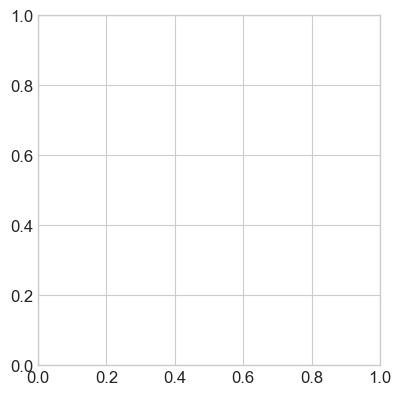

In [8]:
import seaborn as sns
##Khám phá & phân phối của các biến phân loại như giới tính, tình trạng hôn nhân, loại công việc, nơi cư trú và tình trạng hút thuốc.
# Display value counts and create visualizations for categorical variables
import matplotlib.pyplot as plt
# Set up the figure size
plt.figure(figsize=(15, 10))

# Create subplots for each categorical variable
categorical_vars = ['Giới tính', 'Đã kết hôn', 'Nghề nghiệp', 'Loại nhà ở', 'Tình trạng hút thuốc']

for idx, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, idx)
    
    # Get value counts
    counts = df_encoded[var].value_counts()
    print(f"\nDistribution of {var}:")
    print(counts)
    
    # Create bar plot
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


## 🔗 Phân tích hai biến

Phân tích mối quan hệ giữa các biến độc lập với biến mục tiêu (đột quỵ) để xác định các yếu tố nguy cơ tiềm ẩn.

In [ ]:
##Phân tích mối quan hệ giữa các biến độc lập với biến mục tiêu (đột quỵ) để xác định các yếu tố nguy cơ tiềm ẩn.


## 🌐 Phân tích đa biến

Phân tích mối tương quan giữa nhiều biến và tác động kết hợp của chúng đến nguy cơ đột quỵ.

## 🧪 Kiểm định thống kê

Thực hiện các kiểm định thống kê để xác định ý nghĩa thống kê của các mối quan hệ đã phát hiện.

## 🎨 Trực quan hóa nâng cao

Sử dụng các kỹ thuật trực quan hóa nâng cao để khám phá sâu hơn về dữ liệu và mối quan hệ giữa các biến.

## 💡 Kết luận và insights

Tổng hợp các phát hiện chính từ phân tích, xác định các yếu tố nguy cơ hàng đầu liên quan đến đột quỵ và đề xuất hướng phân tích tiếp theo.

In [ ]:
## 📚 Import các thư viện cần thiết

##Để thực hiện phân tích dữ liệu, chúng ta cần import các thư viện Python phổ biến cho phân tích và trực quan hóa dữ liệu.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

# Bỏ qua cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)